In [2]:
import pandas as pd

df = pd.read_csv("data/raw/declarations_cnss_synthétiques.csv")
df.head()


,entreprise_id,date_declaration,secteur,taille,localisation,nb_salaries_declares,salaire_moyen_declare,masse_salariale_declaree,cotisations_dues,date_paiement,jours_retard,montant_paye,sous_declaration_taux,flag_fraude,flag_retard_grave,annee,mois
0,ENT_0001,2022-01-01,ADMINISTRATION_PUBLIQUE,TPE (1-9),DJIBOUTI-VILLE,3,115137,345412,100170,2022-01-11,0,100170,0.6,1,0,2022,1
1,ENT_0001,2022-01-31,ADMINISTRATION_PUBLIQUE,TPE (1-9),DJIBOUTI-VILLE,3,211806,635417,184271,2022-02-10,0,184271,1.0,0,0,2022,1
2,ENT_0001,2022-03-02,ADMINISTRATION_PUBLIQUE,TPE (1-9),DJIBOUTI-VILLE,4,208653,834613,242038,2022-03-12,0,242038,1.0,0,0,2022,3
3,ENT_0001,2022-04-01,ADMINISTRATION_PUBLIQUE,TPE (1-9),DJIBOUTI-VILLE,3,218637,655911,190214,2022-04-11,0,190214,1.0,0,0,2022,4
4,ENT_0001,2022-05-01,ADMINISTRATION_PUBLIQUE,TPE (1-9),DJIBOUTI-VILLE,3,195938,587814,170466,2022-06-10,30,170466,1.0,0,0,2022,5


In [3]:
df.isnull().sum()


entreprise_id               0
date_declaration            0
secteur                     0
taille                      0
localisation                0
nb_salaries_declares        0
salaire_moyen_declare       0
masse_salariale_declaree    0
cotisations_dues            0
date_paiement               0
jours_retard                0
montant_paye                0
sous_declaration_taux       0
flag_fraude                 0
flag_retard_grave           0
annee                       0
mois                        0
dtype: int64

In [4]:
df["cotisations_dues"].sum()


np.int64(15795763026)

In [5]:
df["jours_retard"].mean()


np.float64(6.683333333333334)

In [6]:
df["flag_fraude"].mean()


np.float64(0.12708333333333333)

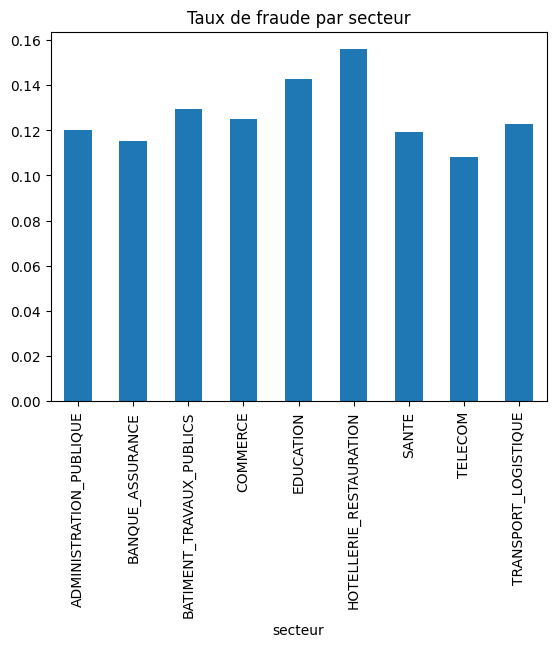

In [7]:
import matplotlib.pyplot as plt

df.groupby("secteur")["flag_fraude"].mean().plot(kind="bar")
plt.title("Taux de fraude par secteur")
plt.show()


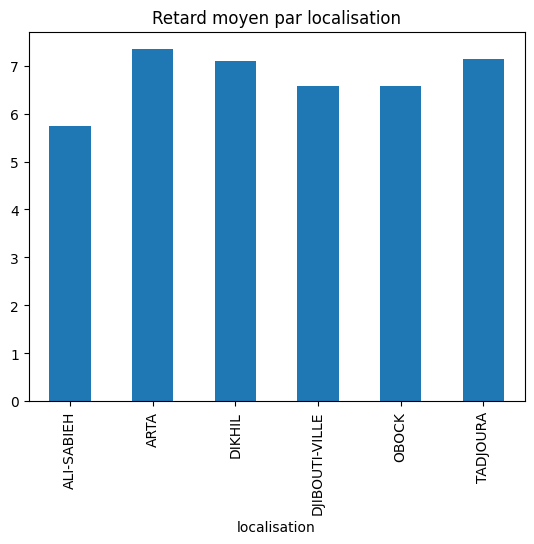

In [8]:
df.groupby("localisation")["jours_retard"].mean().plot(kind="bar")
plt.title("Retard moyen par localisation")
plt.show()


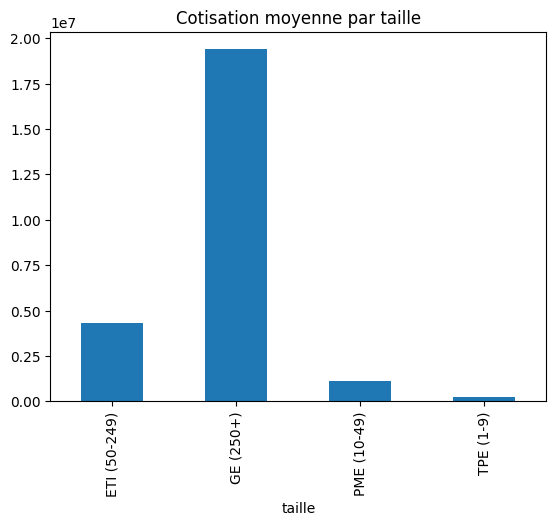

In [9]:
df.groupby("taille")["cotisations_dues"].mean().plot(kind="bar")
plt.title("Cotisation moyenne par taille")
plt.show()


In [10]:
suspects = df[df["flag_fraude"] == 1]
suspects.head()


,entreprise_id,date_declaration,secteur,taille,localisation,nb_salaries_declares,salaire_moyen_declare,masse_salariale_declaree,cotisations_dues,date_paiement,jours_retard,montant_paye,sous_declaration_taux,flag_fraude,flag_retard_grave,annee,mois
0,ENT_0001,2022-01-01,ADMINISTRATION_PUBLIQUE,TPE (1-9),DJIBOUTI-VILLE,3,115137,345412,100170,2022-01-11,0,100170,0.60,1,0,2022,1
7,ENT_0001,2022-07-30,ADMINISTRATION_PUBLIQUE,TPE (1-9),DJIBOUTI-VILLE,4,161598,646392,187454,2022-08-09,0,187454,0.84,1,0,2022,7
11,ENT_0001,2022-11-27,ADMINISTRATION_PUBLIQUE,TPE (1-9),DJIBOUTI-VILLE,4,157533,630133,182738,2022-12-07,0,182738,0.82,1,0,2022,11
23,ENT_0001,2023-11-22,ADMINISTRATION_PUBLIQUE,TPE (1-9),DJIBOUTI-VILLE,4,123743,494973,143542,2023-12-02,0,143542,0.60,1,0,2023,11
32,ENT_0002,2022-08-29,TRANSPORT_LOGISTIQUE,TPE (1-9),DIKHIL,6,92102,552612,160257,2022-09-08,0,160257,0.67,1,0,2022,8
